In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from src.models.synthetic_region.hyperopt import get_data_part, grid_search

data = get_data_part(["top", "mid", "bottom"], 0.02)
data["size"].value_counts()

100.0      28
3.0        15
4.0        12
55000.0     3
53000.0     3
36000.0     3
25000.0     3
20500.0     3
20000.0     3
17000.0     3
11000.0     3
10500.0     3
Name: size, dtype: int64

In [5]:
normalizers = ["none", "mean", "standard", "robust", "power"]

search_spaces = [
    dict(
        normalize=normalizers,
        method=["mean"],
        training_interval=[28],
        prediction_interval=[28],
        agg_weekly=[True, False],
    ),
    dict(
        normalize=normalizers,
        method=["distance"],
        distance__inverse=[False, True],
        training_interval=[28],
        prediction_interval=[28],
        agg_weekly=[True, False],
    ),
    dict(
        normalize=normalizers,
        method=["sociodemographic"],
        sociodemographic__method=["corr", "ols", "pc", "pls", "nmf"],
        sociodemographic__sum_to_one=[True, False],
        training_interval=[28],
        prediction_interval=[28],
        agg_weekly=[True, False],
    ),
    dict(
        normalize=normalizers,
        method=["linear_regression", "ridge"],
        interpretable=[True, False],
        use_autoregressor=[False],
        training_interval=[28, 28 * 3, 28 * 12],
        prediction_interval=[28],
        agg_weekly=[True, False],
    ),
]

import optuna
from sklearn.exceptions import ConvergenceWarning

optuna.logging.disable_default_handler()

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

from src.models.synthetic_region.hyperopt import grid_search

study_names = grid_search(
    data, search_spaces, "eval-basic-tiny-v3", n_jobs=1, n_trials=300
)

  0%|          | 0/82 [00:00<?, ?it/s]

`GridSampler` is re-evaluating a configuration because the grid has been exhausted. This may happen due to a timing issue during distributed optimization or when re-running optimizations on already finished studies.
`GridSampler` is re-evaluating a configuration because the grid has been exhausted. This may happen due to a timing issue during distributed optimization or when re-running optimizations on already finished studies.
`GridSampler` is re-evaluating a configuration because the grid has been exhausted. This may happen due to a timing issue during distributed optimization or when re-running optimizations on already finished studies.
`GridSampler` is re-evaluating a configuration because the grid has been exhausted. This may happen due to a timing issue during distributed optimization or when re-running optimizations on already finished studies.
`GridSampler` is re-evaluating a configuration because the grid has been exhausted. This may happen due to a timing issue during distrib

ValueError: Input contains infinity or a value too large for dtype('float64').

In [7]:
import optuna

# storage = optuna.storages.RDBStorage(
#     url="sqlite:///" + (project_root / "hyperopt" / "eval-basic-tiny-v3.db").as_posix()
# )
storage = optuna.storages.JournalStorage(
    optuna.storages.JournalFileStorage(
        (project_root / "hyperopt" / "eval-basic-tiny-v3.db").as_posix()
    )
)
studies = storage.get_all_studies()

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_31911/1176794496.py:7: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  storage = optuna.storages.JournalStorage(


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 26: invalid start byte

In [3]:
import pandas as pd

best_trials = [storage.get_best_trial(s._study_id) for s in studies]
params = [dict(**t.params, **t.user_attrs) for t in best_trials]
df = pd.DataFrame(params)

In [4]:
df

,agg_weekly,method,normalize,training_interval,Unnamed: 0,admin1,assoc_actor_1,co_terms,comparison_df,comparison_df_normalized,...,relative_impact_7_days,rrmse_mean,rrmse_std,rrmses,seed,size,source,start_date,sub_event_type,weekday
0,True,mean,mean,28,114,Berlin,FFF: Fridays for Future; Students (Germany),NaN,"{""true"":{""-52"":36.5714285714,""-51"":26.0,""-50"":...","{""true"":{""-52"":1.5395189003,""-51"":1.0945017182...",...,0.560643,0.269471,0.05991,"[0.29308437877221166, 0.3567451539740102, 0.21...",20230413,55000.0,mediacloud,2020-01-01,Peaceful protest,Friday


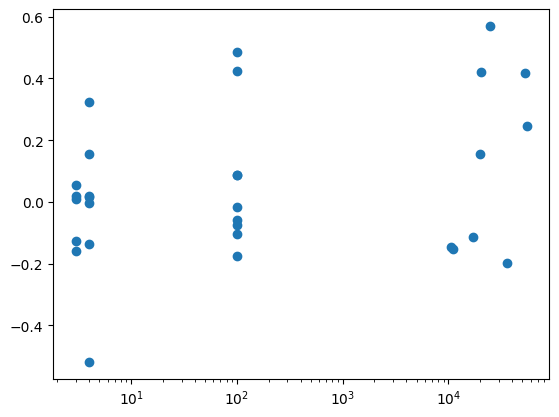

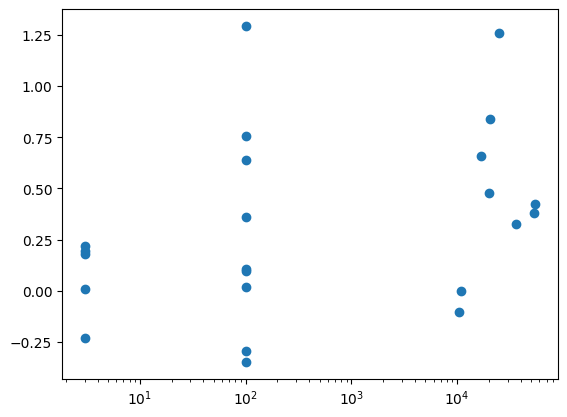

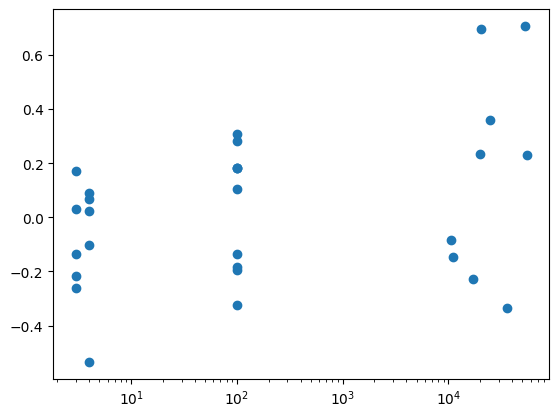

In [17]:
import matplotlib.pyplot as plt

df_ = df[df["discourse_type"] == "climate"]
plt.plot(df_["size"], df_["relative_impact_3_days"], "o")
plt.xscale("log")
plt.show()

df_ = df[df["discourse_type"] == "climate_and_protest"]
plt.plot(df_["size"], df_["relative_impact_3_days"], "o")
plt.xscale("log")
plt.show()

df_ = df[df["discourse_type"] == "climate_not_protest"]
plt.plot(df_["size"], df_["relative_impact_3_days"], "o")
plt.xscale("log")
plt.show()

<Axes: >

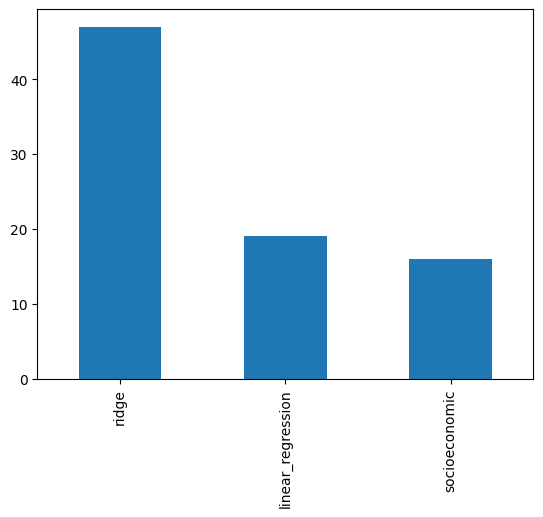

In [18]:
df["method"].value_counts().plot(kind="bar")

<Axes: >

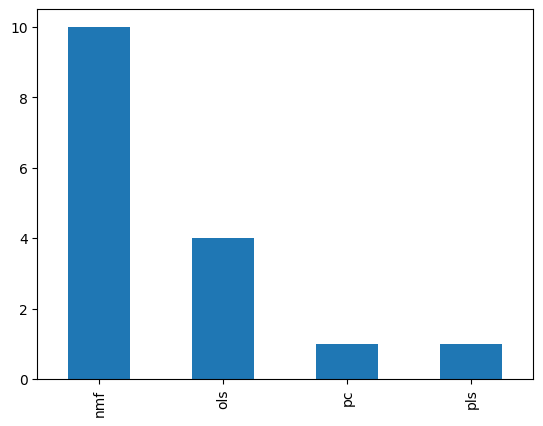

In [19]:
df["sociodemographic__method"].value_counts().plot(kind="bar")

In [20]:
trials = [storage.get_all_trials(s._study_id) for s in tqdm(studies)]

  0%|          | 0/82 [00:00<?, ?it/s]

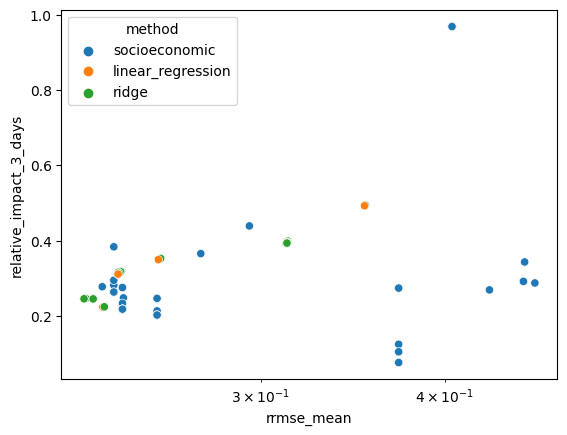

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
17,0.234282,socioeconomic,ols,False,standard,0.277181
0,0.238544,socioeconomic,pls,True,robust,0.281605
47,0.238544,socioeconomic,pc,True,robust,0.294306
13,0.238544,socioeconomic,nmf,True,robust,0.383311
14,0.238544,socioeconomic,corr,True,robust,0.263094
23,0.238544,socioeconomic,corr,False,robust,0.263094
19,0.238544,socioeconomic,ols,True,robust,0.383311
54,0.241786,socioeconomic,corr,False,standard,0.217554
49,0.241786,socioeconomic,corr,False,standard,0.217554
45,0.241786,socioeconomic,corr,True,standard,0.217554


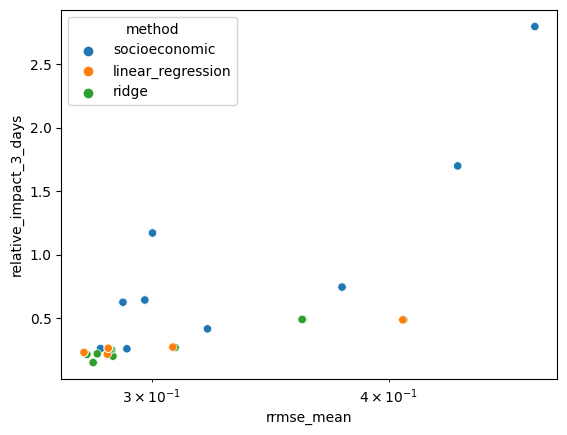

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
23,0.281818,socioeconomic,ols,False,standard,0.261268
14,0.289643,socioeconomic,ols,True,standard,0.625475
21,0.289643,socioeconomic,corr,True,standard,0.625475
12,0.289643,socioeconomic,pls,True,standard,0.625475
29,0.289643,socioeconomic,corr,False,standard,0.625475
45,0.289643,socioeconomic,nmf,True,standard,0.625475
4,0.289643,socioeconomic,pc,True,standard,0.625475
30,0.291032,socioeconomic,ols,False,power,0.259836
13,0.297451,socioeconomic,ols,True,power,0.643407
35,0.297451,socioeconomic,pc,True,power,0.643407


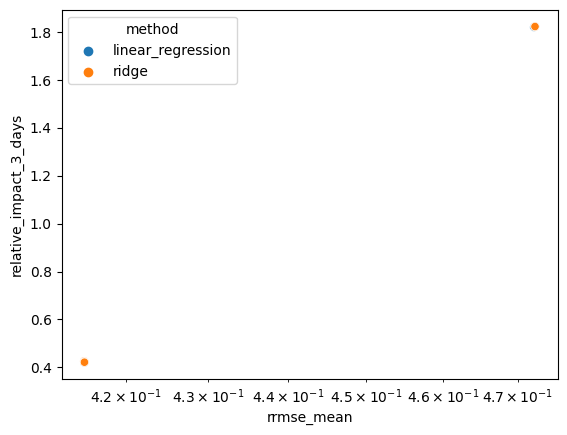

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days


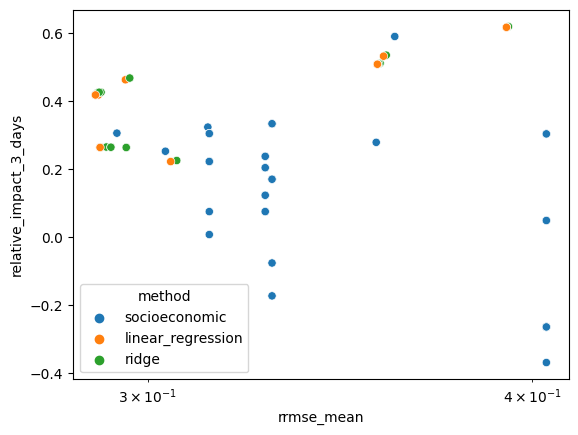

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
8,0.293117,socioeconomic,ols,False,standard,0.306051
47,0.303953,socioeconomic,ols,False,power,0.252876
16,0.313761,socioeconomic,ols,False,robust,0.323846
43,0.314105,socioeconomic,corr,True,standard,0.222731
54,0.314105,socioeconomic,corr,False,standard,0.222731
26,0.314105,socioeconomic,nmf,True,standard,0.304828
25,0.314105,socioeconomic,pc,True,standard,0.008110
17,0.314105,socioeconomic,ols,True,standard,0.304828
28,0.314105,socioeconomic,pls,True,standard,0.075507
38,0.314105,socioeconomic,corr,False,standard,0.222731


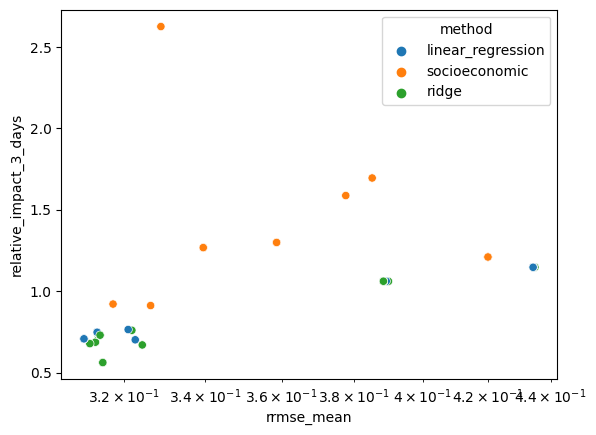

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
45,0.317457,socioeconomic,ols,False,standard,0.920577
8,0.326486,socioeconomic,ols,False,power,0.911381
44,0.328997,socioeconomic,ols,False,robust,2.624256
4,0.339560,socioeconomic,ols,True,standard,1.267080
7,0.339560,socioeconomic,nmf,True,standard,1.267080
12,0.339560,socioeconomic,pc,True,standard,1.267080
43,0.339560,socioeconomic,corr,False,standard,1.267080
16,0.339560,socioeconomic,pls,True,standard,1.267080
33,0.339560,socioeconomic,corr,True,standard,1.267080
9,0.358664,socioeconomic,nmf,True,power,1.298711


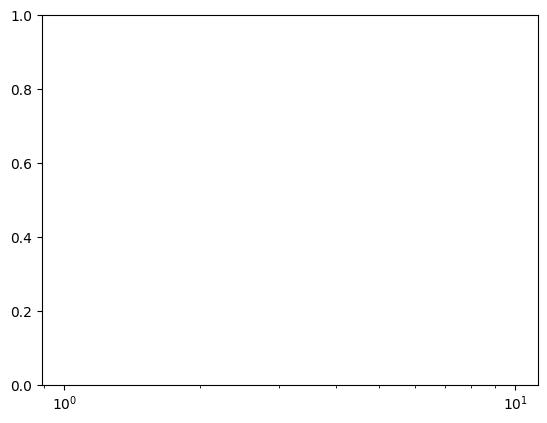

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days


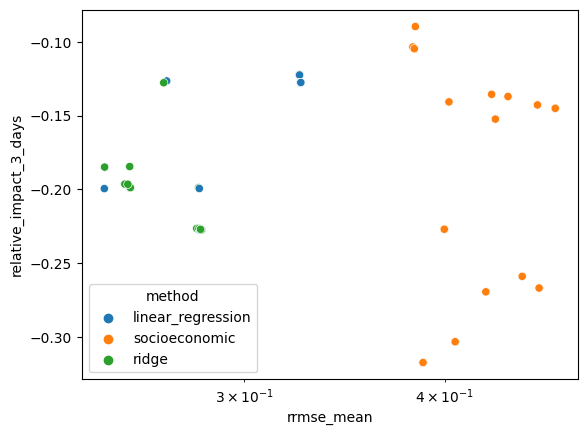

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
2,0.382197,socioeconomic,pls,False,robust,-0.103418
20,0.382992,socioeconomic,pls,False,power,-0.104609
23,0.383562,socioeconomic,pls,False,standard,-0.089562
11,0.387835,socioeconomic,corr,False,robust,-0.317332
31,0.387835,socioeconomic,corr,True,robust,-0.317332
12,0.399857,socioeconomic,corr,False,power,-0.226943
24,0.399857,socioeconomic,corr,True,power,-0.226943
48,0.402551,socioeconomic,nmf,True,power,-0.140638
36,0.406154,socioeconomic,corr,True,standard,-0.303242
27,0.406154,socioeconomic,corr,False,standard,-0.303242


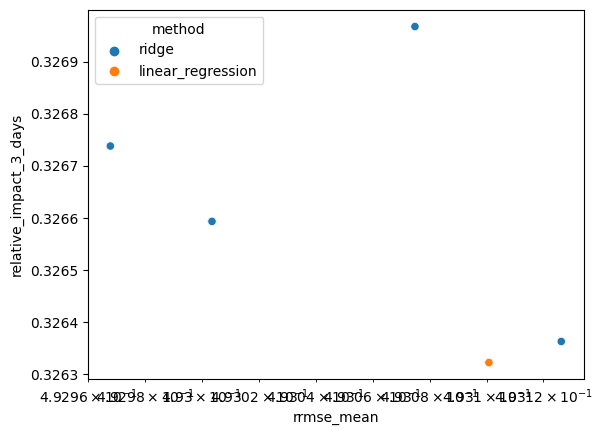

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days


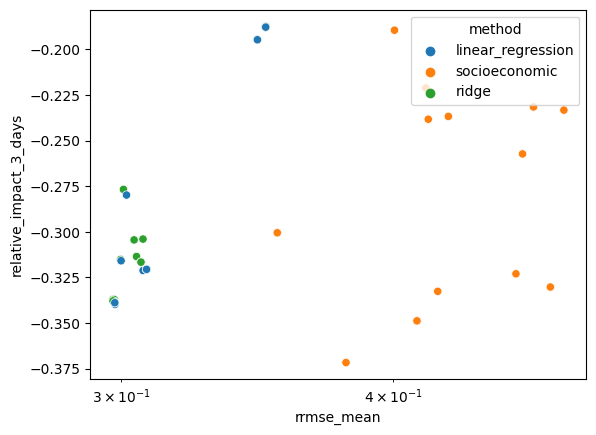

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
23,0.353829,socioeconomic,corr,False,robust,-0.300543
42,0.353829,socioeconomic,corr,True,robust,-0.300543
26,0.380484,socioeconomic,corr,True,power,-0.371652
48,0.380484,socioeconomic,corr,False,power,-0.371652
2,0.400499,socioeconomic,pls,False,robust,-0.189538
11,0.410127,socioeconomic,corr,False,standard,-0.348801
28,0.410127,socioeconomic,corr,True,standard,-0.348801
45,0.413973,socioeconomic,pls,False,power,-0.221198
16,0.415048,socioeconomic,pls,False,standard,-0.238331
37,0.419233,socioeconomic,nmf,True,robust,-0.332629


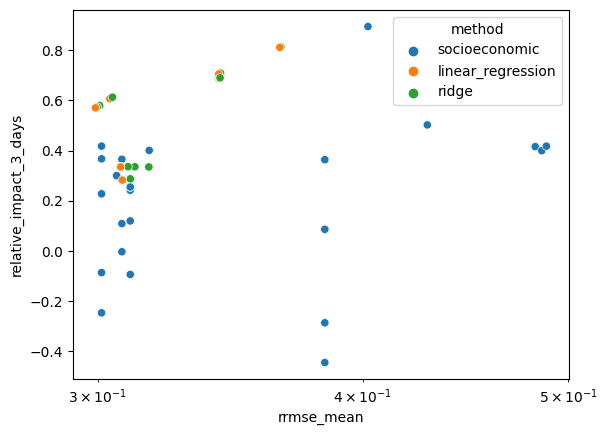

,rrmse_mean,method,socioeconomic__method,socioeconomic__sum_to_one,normalize,relative_impact_3_days
22,0.301306,socioeconomic,ols,False,standard,0.367097
0,0.301307,socioeconomic,pls,True,robust,-0.086652
4,0.301307,socioeconomic,nmf,True,robust,0.417787
7,0.301307,socioeconomic,corr,True,robust,0.227584
40,0.301307,socioeconomic,corr,False,robust,0.227584
24,0.301307,socioeconomic,ols,True,robust,0.417787
21,0.301307,socioeconomic,pc,True,robust,-0.247206
60,0.306274,socioeconomic,ols,False,power,0.299985
59,0.306274,socioeconomic,ols,False,power,0.299985
58,0.306274,socioeconomic,ols,False,power,0.299985


In [51]:
import seaborn as sns

for trial in trials[:10]:
    df = pd.DataFrame([dict(**t.params, **t.user_attrs) for t in trial])
    df = df[df["rrmse_mean"] < 0.5]
    df = df[df["relative_impact_3_days"].abs() < 5]
    sns.scatterplot(data=df, x="rrmse_mean", y="relative_impact_3_days", hue="method")
    plt.xscale("log")
    plt.show()
    display(
        df[df["method"] == "sociodemographic"].sort_values("rrmse_mean")[
            [
                "rrmse_mean",
                "method",
                "sociodemographic__method",
                "sociodemographic__sum_to_one",
                "normalize",
                "relative_impact_3_days",
            ]
        ]
    )

TODO: time-series plots